In [77]:
import numpy as np
import pandas as pd

In [78]:
df=pd.read_excel('/Users/Shubham Shah/Desktop/Jupyter Notebook/Stock Market WebApp/Stock Market/LSTM/icici.xlsx')

In [79]:
df.head()

,Time,NII,NIM,BookValue,CASA,ROE,Net NPA,PCR,Advances,OCR cost/income,CAR,PAT,COProfit,Price
0,Q1-2009,20.90,2.4,425.8,28.0,6.1,1.74,50.0,2241.46,52.1,13.42,7.28,23.08,115.872726
1,Q2-2009,21.48,2.4,437.0,30.0,8.4,1.83,50.0,2219.85,42.5,14.01,10.14,24.37,72.500000
2,Q3-2009,19.90,2.4,449.5,27.4,10.2,1.95,50.0,2125.21,37.7,15.60,12.72,27.71,75.681816
3,Q4-2009,21.39,2.6,445.0,28.7,6.1,1.96,50.0,2183.11,42.7,15.50,7.44,21.56,87.454544
4,Q1-2010,19.85,2.4,451.0,30.4,7.0,2.19,51.1,1981.02,37.1,17.40,8.78,25.29,137.909088


In [80]:
X = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].values
Y = df.iloc[:,[1]].values

In [81]:
X.shape

(57, 12)

In [82]:
Y

array([[ 20.9 ],
       [ 21.48],
       [ 19.9 ],
       [ 21.39],
       [ 19.85],
       [ 20.36],
       [ 20.58],
       [ 20.35],
       [ 19.91],
       [ 22.04],
       [ 23.12],
       [ 25.1 ],
       [ 24.11],
       [ 25.06],
       [ 27.12],
       [ 31.05],
       [ 31.93],
       [ 33.71],
       [ 34.99],
       [ 38.03],
       [ 38.2 ],
       [ 40.44],
       [ 42.55],
       [ 43.57],
       [ 44.92],
       [ 46.57],
       [ 48.12],
       [ 50.79],
       [ 51.15],
       [ 52.51],
       [ 54.53],
       [ 54.05],
       [ 51.59],
       [ 52.53],
       [ 53.63],
       [ 53.62],
       [ 55.9 ],
       [ 57.09],
       [ 57.05],
       [ 60.22],
       [ 61.02],
       [ 64.18],
       [ 68.75],
       [ 76.2 ],
       [ 77.37],
       [ 80.57],
       [ 85.45],
       [ 89.27],
       [ 92.8 ],
       [ 93.66],
       [ 99.12],
       [104.31],
       [109.36],
       [116.9 ],
       [122.36],
       [126.05],
       [132.1 ]])

In [83]:
Y.shape

(57, 1)

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline


In [85]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_new = sc.fit_transform(X)
Y_new=sc.fit_transform(Y)

In [86]:
X_new

array([[0.        , 0.        , 0.03045685, 0.35672515, 0.26401869,
        0.        , 0.06264623, 1.        , 0.        , 0.10371848,
        0.01872613, 0.05813259],
       [0.        , 0.01313475, 0.1319797 , 0.49122807, 0.28504673,
        0.        , 0.05962957, 0.63218391, 0.08702065, 0.14446502,
        0.0346187 , 0.        ],
       [0.        , 0.02779407, 0.        , 0.59649123, 0.31308411,
        0.        , 0.04641826, 0.44827586, 0.32153392, 0.1812224 ,
        0.07576691, 0.0042646 ],
       [0.1242236 , 0.02251671, 0.06598985, 0.35672515, 0.31542056,
        0.        , 0.05450083, 0.63984674, 0.30678466, 0.10599801,
        0.        , 0.02004362],
       [0.        , 0.02955318, 0.15228426, 0.40935673, 0.36915888,
        0.0298913 , 0.02629   , 0.42528736, 0.58702065, 0.12508904,
        0.04595294, 0.08766799],
       [0.0621118 , 0.04010789, 0.4822335 , 0.47368421, 0.36915888,
        0.04619565, 0.0161805 , 0.38697318, 0.63126844, 0.14816925,
        0.03437231,

In [87]:
Y_new

array([[9.35412027e-03],
       [1.45211581e-02],
       [4.45434298e-04],
       [1.37193764e-02],
       [0.00000000e+00],
       [4.54342984e-03],
       [6.50334076e-03],
       [4.45434298e-03],
       [5.34521158e-04],
       [1.95100223e-02],
       [2.91314031e-02],
       [4.67706013e-02],
       [3.79510022e-02],
       [4.64142539e-02],
       [6.47661470e-02],
       [9.97772829e-02],
       [1.07616927e-01],
       [1.23474388e-01],
       [1.34877506e-01],
       [1.61959911e-01],
       [1.63474388e-01],
       [1.83429844e-01],
       [2.02227171e-01],
       [2.11314031e-01],
       [2.23340757e-01],
       [2.38040089e-01],
       [2.51848552e-01],
       [2.75634744e-01],
       [2.78841871e-01],
       [2.90957684e-01],
       [3.08953229e-01],
       [3.04677060e-01],
       [2.82761693e-01],
       [2.91135857e-01],
       [3.00935412e-01],
       [3.00846325e-01],
       [3.21158129e-01],
       [3.31759465e-01],
       [3.31403118e-01],
       [3.59643653e-01],


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y_new,test_size=0.30,random_state=0)

In [89]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\Shubham Shah\AppData\Local\Temp\ipykernel_12568\1458309908.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
y_pred=y_pred.reshape(-1,1)

In [92]:
y_pred.shape

(18, 1)

In [93]:
y_pred = sc.inverse_transform(y_pred)


In [94]:
Y_test=sc.inverse_transform(Y_test)
Y_train=sc.inverse_transform(Y_train)

[]

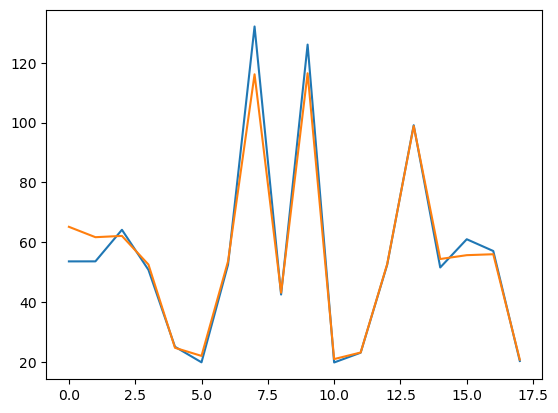

In [95]:


plt.plot(Y_test)
plt.plot(y_pred)
plt.plot()

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(Y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, y_pred))

Mean squared error: 33.25
Coefficient of determination: 0.97
